In [1]:
import pandas as pd 
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
min,max = df["price_per_sqft"].quantile([0.001,0.999])
df_quartiles = df[(df["price_per_sqft"]>min) & (df["price_per_sqft"]<max)]
print(f"The minimum and maximum values used are {min} and {max}")
df_quartiles.head()

The minimum and maximum values used are 1366.184 and 50959.36200000098


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [68]:
std,mu = df_quartiles["price_per_sqft"].std(),df_quartiles["price_per_sqft"].mean()
df_quartiles.loc[:,"price_per_sqft"] = (df_quartiles["price_per_sqft"]-mu)/std   
#Standarising the data or converting into ZScores,don't use df["price_per_sqft"] since it's raw unfiltered data

'For any outlier removal using ZScore , subtracting the mean centers the data, and scaling with std preserves symmetry around mean'

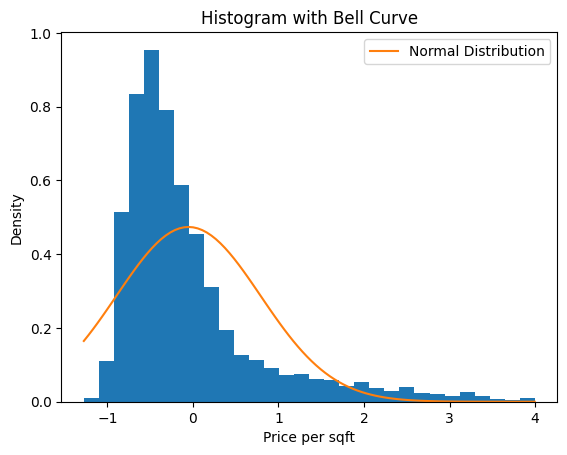

In [74]:
df_normal = df_quartiles[np.abs(df_quartiles["price_per_sqft"])<(4*std)]
count,bins,plot = plt.hist(df_normal["price_per_sqft"],bins=30,density=True)     
# """plt.hist gives two arrays - first contains frequencies corresponding to each bar and 2nd contains edge values of each bar , density = True returns probability that the values lies
# within this range rather than just frequencies ."""
min,max = df_normal["price_per_sqft"].min(),df_normal["price_per_sqft"].max()
x = np.linspace(min,max,100)
p = norm.pdf(x,df_normal["price_per_sqft"].mean(),df_normal["price_per_sqft"].std())
plt.plot(x,p,label = "Normal Distribution")
plt.xlabel("Price per sqft")
plt.ylabel("Density")
plt.title("Histogram with Bell Curve")
plt.legend()
"""For any outlier removal using ZScore , subtracting the mean centers the data, and scaling with std preserves symmetry around mean"""

"You're trying to filter out outliers using Z-scores — but you're calculating the mean and standard deviation on the full (unfiltered) dataset, which includes extreme outliers.\nWhy the Histogram Looks Wrong:\n\nOutliers inflate the mean → pulls the center of the distribution to the right.\n\nOutliers inflate the std → stretches the scale, so even moderate values appear closer to zero.\n\nSo when you apply np.abs(z) < 3 * std1, you think you're keeping “normal” data — but the scale is warped.\n\nThis makes the histogram look compressed or lopsided, and the normal curve won't align properly.\n\n"

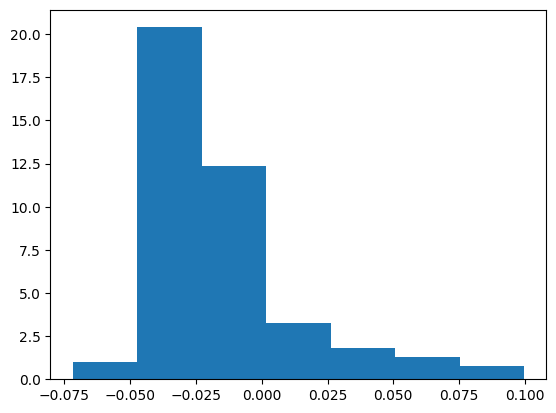

In [89]:
std1,mu1 = df["price_per_sqft"].std(),df["price_per_sqft"].mean()
df1 = df.copy()
df1.loc[:,"price_per_sqft"] = (df1["price_per_sqft"]-mu1)/std1    #Calculating ZScore
a = df1[np.abs(df1["price_per_sqft"])<(0.1*std1)]
count,bins,plot = plt.hist(a["price_per_sqft"],bins=7,density=True)

"""You're trying to filter out outliers using Z-scores — but you're calculating the mean and standard deviation on the full (unfiltered) dataset, which includes extreme outliers.
Why the Histogram Looks Wrong:

Outliers inflate the mean → pulls the center of the distribution to the right.

Outliers inflate the std → stretches the scale, so even moderate values appear closer to zero.

So when you apply np.abs(z) < 3 * std1, you think you're keeping “normal” data — but the scale is warped.

This makes the histogram look compressed or lopsided, and the normal curve won't align properly.

"""